# <center> ***Maestría en Inteligencia Artificial Aplicada*** </center>
## <center> ***Proyecto Integrador*** </center>
### <center> ***Avance 1. Análisis exploratorio de datos*** </center>

#### Prof. Dra. Grettel Barceló Alonso. Prof. Dr. Luis Eduardo Falcón Morales

#### Alumnos: 
* Aurelio Antonio Lozano Rábago      A01081266


#### <p style='text-align: right;'> 5 de Mayo del 2024 </p>

Data to analyze the automation of the boundary recording will be split into 3 main categories, aiming to fulfill the input key aspects identifyed on phase 0:

* How to detect the boundary o the property?
* How to detect link chain fences, wire fences or wide spaced fences?
* How to determine if the sufrace is grass and no other vegetation?

Initial data exploration will focus on those scenarios, having a strong focus on the most common use case, which for development pusposes it will be the Toro Robotics Colorado test field.

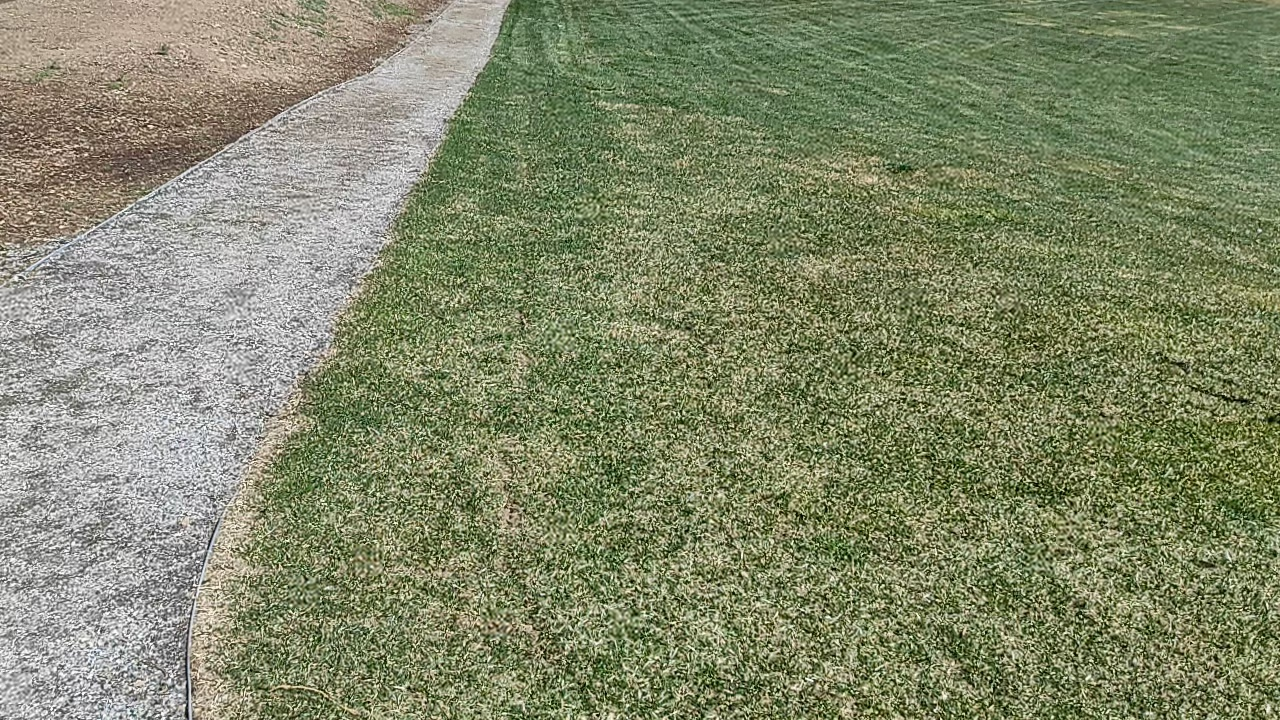 <!-- width="200" height="150" -->

For the rest of the scenarios, following representative images were selected:

In [ ]:
image_paths = [
    'ImagenesA1/frame1.jpeg',
    'ImagenesA1/frame2.jpeg',
    'ImagenesA1/frame3.jpeg',
    'ImagenesA1/frame4.jpeg',
    'ImagenesA1/frame5.jpeg',
    'ImagenesA1/frame6.jpeg',
    'ImagenesA1/frame7.jpeg',
    'ImagenesA1/frame8.jpeg',
    'ImagenesA1/frame9.jpeg',
    'ImagenesA1/Internet/frame1.jpeg',
    'ImagenesA1/Internet/frame2.jpeg',
    'ImagenesA1/Internet/frame3.jpeg',
    'ImagenesA1/Internet/frame4.jpeg',
    'ImagenesA1/Internet/frame5.jpeg',
    'ImagenesA1/Internet/frame6.jpeg',
    'ImagenesA1/Internet/frame7.jpeg',
    'ImagenesA1/Internet/frame8.jpeg',
    'ImagenesA1/Internet/frame9.jpeg',
    'ImagenesA1/Internet/frame10.jpeg',
    'ImagenesA1/Internet/frame11.jpeg',
    'ImagenesA1/Internet/frame12.jpeg',
    'ImagenesA1/Internet/frame13.jpeg',
    'ImagenesA1/Internet/frame14.jpeg',
    'ImagenesA1/Internet/frame15.jpeg',
    'ImagenesA1/Internet/frame16.jpeg',
    'ImagenesA1/Internet/frame17.jpeg',
    'ImagenesA1/Internet/frame18.jpeg',
    'ImagenesA1/Internet/frame19.jpeg',
    'ImagenesA1/Internet/frame20.jpeg',
    'ImagenesA1/Internet/frame21.jpeg',
    'ImagenesA1/Internet/frame22.jpeg',
    'ImagenesA1/Plantas/frame1.jpeg',
    'ImagenesA1/Plantas/frame2.jpeg',
    'ImagenesA1/Plantas/frame3.jpeg',
    'ImagenesA1/Plantas/frame4.jpeg',
    'ImagenesA1/Plantas/frame5.jpeg',
    'ImagenesA1/Plantas/frame6.jpeg',
    'ImagenesA1/Plantas/frame7.jpeg',
    'ImagenesA1/Plantas/frame8.jpeg',
    'ImagenesA1/Plantas/frame9.jpeg',
    'ImagenesA1/Plantas/frame10.jpeg',
    'ImagenesA1/Plantas/frame11.jpeg',
    'ImagenesA1/Plantas/frame12.jpeg',
    'ImagenesA1/Plantas/frame13.jpeg',
    'ImagenesA1/Plantas/frame14.jpeg',
    'ImagenesA1/Plantas/frame15.jpeg',
]

In [ ]:
#import and load the libraries.
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(15, 10))

# Iterar sobre las rutas de las imágenes
for i, image_path in enumerate(image_paths):
    image = mpimg.imread(image_path)
    
    # Agregar la imagen a la sub-figura correspondiente en una matriz de 5x5
    plt.subplot(7, 7, i+1)
    plt.imshow(image)
    plt.axis('off')  # Ocultar los ejes
    
    # Obtener el nombre del archivo y mostrarlo como título
    filename = image_path.split('/')[-1]
    plt.title(filename)

# Ajustar el diseño de las sub-figuras
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Boundary detection

Initial approach to detect boundaries was to use a edge detection mechanism. The following example used OpenCV to extract the edges of an image, in this case Messi. 

In [ ]:
#The following code extracts the edges of the image.
img = cv2.imread('ImagenesA1/messi.jpeg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

Unfortunately, the algorithm did not performed well on grass surfaces, as it can be seen in the following demonstration.

In [ ]:
#Load the test field image and re-use the Canny configuration to extract the edges of the image.
img = cv2.imread('ImagenesA1/frame1.jpeg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

Different filtering techniques were applied to the image and none of the explored (please check the jupyter notebook Avance1_TestFieldFiltros.ipynb for further details) was performing good enough to keep this strategy for idendify the boundaries. 

Following cells are to provide an overview of the exploratory analysis of different filter settings. Overall there more than 19 combinations, the final notebook includes the following:
   * "Blurred (5x5)",
   * "Gaussian Blur (3x3)",
   * "Gaussian Blur (5x5)",
   * "Gaussian Blur (7x7)",
   * "Median Blur (3)",
   * "Median Blur (5)",
   * "Median Blur (7)",
   * "erode 1 iteration",
   * "erode 2 iteration",
   * "3 erode 1 iteration",
   * "3 erode 2 iteration",
   * "5 erode 1 iteration",
   * "5 erode 2 iteration",
   * "7 erode 1 iteration",
   * "bilateral 3 sigma 75",
   * "bilateral 5 sigma 75",
   * "bilateral 9 sigma 75",
   * "bilateral 3 sigma 25",
   * "bilateral 3 sigma 150",

In [ ]:
# one image for demonstration, for other examples please check Avance1_TestFieldFiltros.ipynb
image_paths = [
    'ImagenesA1/frame1.jpeg']
images = [cv2.imread(path) for path in image_paths]

In [ ]:
# Images descriptions
descriptions = [
    "Original",
    "Blurred (5x5)",
    "Gaussian Blur (3x3)",
    "Gaussian Blur (5x5)",
    "Gaussian Blur (7x7)",
    "Median Blur (5)"
]

fig, axes = plt.subplots(2, 5, figsize=(15, 5))

# Iterar sobre cada subfigura y mostrar una imagen con su respectivo filtro
for i, image in enumerate(images):
    # Original image + Canny
    canny_original = cv2.Canny(image, 100, 200)
    
    # Set or filters
    filtered_image1 = cv2.blur(image, (5, 5))
    filtered_image2 = cv2.GaussianBlur(image, (3, 3), 1, 1)
    filtered_image3 = cv2.GaussianBlur(image, (5, 5), 1, 1)
    filtered_image4 = cv2.GaussianBlur(image, (7, 7), 1, 1)
    
    # Apply Canny filter
    canny_filtered_image1 = cv2.Canny(filtered_image1, 100, 200)
    canny_filtered_image2 = cv2.Canny(filtered_image2, 100, 200)
    canny_filtered_image3 = cv2.Canny(filtered_image3, 100, 200)
    canny_filtered_image4 = cv2.Canny(filtered_image4, 100, 200)

    
    # Show images
    axes[(i*2), 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[(i*2), 0].set_title(descriptions[0])
    axes[(i*2+1), 0].imshow(canny_original, cmap='gray')
    axes[(i*2+1), 0].set_title("Canny (Original)")
    axes[(i*2), 0].axis('off')
    axes[(i*2+1), 0].axis('off')
    
    axes[(i*2), 1].imshow(cv2.cvtColor(filtered_image1, cv2.COLOR_BGR2RGB))
    axes[(i*2), 1].set_title(descriptions[1])
    axes[(i*2+1), 1].imshow(canny_filtered_image1, cmap='gray')
    axes[(i*2+1), 1].set_title("Canny blur")
    axes[(i*2+1), 1].axis('off')
    axes[(i*2), 1].axis('off')
    
    axes[(i*2), 2].imshow(cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB))
    axes[(i*2), 2].set_title(descriptions[2])
    axes[(i*2+1), 2].imshow(canny_filtered_image2, cmap='gray')
    axes[(i*2+1), 2].set_title("Canny Gaussian Blur (3x3)")
    axes[(i*2+1), 2].axis('off')
    axes[(i*2), 2].axis('off')
    
    axes[(i*2), 3].imshow(cv2.cvtColor(filtered_image3, cv2.COLOR_BGR2RGB))
    axes[(i*2), 3].set_title(descriptions[3])
    axes[(i*2+1), 3].imshow(canny_filtered_image3, cmap='gray')
    axes[(i*2+1), 3].set_title("Canny Gaussian Blur (5x5)")
    axes[(i*2+1), 3].axis('off')
    axes[(i*2), 3].axis('off')
    
    axes[(i*2), 4].imshow(cv2.cvtColor(filtered_image4, cv2.COLOR_BGR2RGB))
    axes[(i*2), 4].set_title(descriptions[4])
    axes[(i*2+1), 4].imshow(canny_filtered_image4, cmap='gray')
    axes[(i*2+1), 4].set_title("Canny Gaussian Blur (7x7)")
    axes[(i*2+1), 4].axis('off')
    axes[(i*2), 4].axis('off')
    

plt.tight_layout()
plt.show()

As it can be noticed, the Blur filter showed better results for this particular example and set of filters. However, it was not good enough to reliably identify the boundary of the grass, were the results were even worse for shadowed areas. Please refer to Avance1_TestFieldFIltros.ipynb

The option to use a filter based color was better, performing well even in shadowed areas, as it can be seen in the next cells.

In [ ]:
#process other images
image_paths = [
    'ImagenesA1/frame1.jpeg',
    'ImagenesA1/frame2.jpeg',
    'ImagenesA1/frame3.jpeg',
    'ImagenesA1/frame4.jpeg',
    'ImagenesA1/frame5.jpeg',
    'ImagenesA1/frame6.jpeg',
    'ImagenesA1/frame7.jpeg',
    'ImagenesA1/frame8.jpeg',
    'ImagenesA1/frame9.jpeg'
]

descriptions = [
    "Frame",
    "processed"
]

images = [cv2.imread(path) for path in image_paths]

In [ ]:
# Define the green color range
lower_green = np.array([20, 30, 40])  # low green value
upper_green = np.array([90, 255, 255]) # high green value

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(18, 50))

for i, image in enumerate(images):

    
    # filtering the image
    original = image
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # green color binary mask
    mask = cv2.inRange(hsv, lower_green, upper_green)
    # blur green area
    blurred_image = cv2.bitwise_and(image, image, mask=mask)
    
    # filtered image + canny
    axes[(i), 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[(i), 0].set_title(descriptions[0] + str(i+1))
    axes[(i), 0].axis('off')
    axes[(i), 1].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    axes[(i), 1].set_title(descriptions[1] + str(i+1))
    axes[(i), 1].axis('off')
    

plt.tight_layout()
plt.show()

# Fence/Vegetation Identification

Folliwing cells shows the challenges that fences and vegetation represents for the color based filter

In [ ]:
image_paths = [
    'ImagenesA1/frame1.jpeg',
    'ImagenesA1/frame5.jpeg',
    'ImagenesA1/Internet/frame2.jpeg',
    'ImagenesA1/Internet/frame8.jpeg',
    'ImagenesA1/Internet/frame18.jpeg',
    'ImagenesA1/Internet/frame1.jpeg',
    'ImagenesA1/Plantas/frame2.jpeg',
    'ImagenesA1/Plantas/frame3.jpeg',
    'ImagenesA1/Plantas/frame7.jpeg'
]

descriptions = [
    "Frame",
    "processed"
]

# Leer las imágenes
images = [cv2.imread(path) for path in image_paths]

In [ ]:
# Define the green color range
lower_green = np.array([20, 30, 40])  # low green value
upper_green = np.array([90, 255, 255]) # high green value

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(18, 50))
green_filtered = []

for i, image in enumerate(images):


    # filters
    original = image
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # green mask
    mask = cv2.inRange(hsv, lower_green, upper_green)
    # filter green area
    blurred_image = cv2.bitwise_and(image, image, mask=mask)
    green_filtered.append(blurred_image)
    
    # Mostrar imágenes filtradas y sus filtros Canny
    axes[(i), 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[(i), 0].set_title(descriptions[0] + str(i+1))
    axes[(i), 0].axis('off')
    axes[(i), 1].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    axes[(i), 1].set_title(descriptions[1] + str(i+1))
    axes[(i), 1].axis('off')
    
plt.tight_layout()
plt.show()

# Edge detection

It becomes evident that further processing is required to delimit the grass area.

Edge detection will be done over the images to explore the performance.

## Blur and Gaussian Blur exploration

In [ ]:
descriptions = [
    "Frame",
    "Blurred (5x5)",
    "Gaussian Blur (3x3)",
    "Gaussian Blur (5x5)",
    "Gaussian Blur (7x7)",
    "Median Blur (5)"
]


fig, axes = plt.subplots(18, 5, figsize=(18, 50))


for i, image in enumerate(green_filtered):
    canny_original = cv2.Canny(image, 100, 200)
    
    filtered_image1 = cv2.blur(image, (5, 5))
    filtered_image2 = cv2.GaussianBlur(image, (3, 3), 1, 1)
    filtered_image3 = cv2.GaussianBlur(image, (5, 5), 1, 1)
    filtered_image4 = cv2.GaussianBlur(image, (7, 7), 1, 1)
    

    canny_filtered_image1 = cv2.Canny(filtered_image1, 100, 200)
    canny_filtered_image2 = cv2.Canny(filtered_image2, 100, 200)
    canny_filtered_image3 = cv2.Canny(filtered_image3, 100, 200)
    canny_filtered_image4 = cv2.Canny(filtered_image4, 100, 200)


    axes[(i*2), 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[(i*2), 0].set_title(descriptions[0] +str(i+1))
    axes[(i*2+1), 0].imshow(canny_original, cmap='gray')
    axes[(i*2+1), 0].set_title("Canny (Original)")
    axes[(i*2), 0].axis('off')
    axes[(i*2+1), 0].axis('off')
    
    axes[(i*2), 1].imshow(cv2.cvtColor(filtered_image1, cv2.COLOR_BGR2RGB))
    axes[(i*2), 1].set_title(descriptions[1]+str(i+1))
    axes[(i*2+1), 1].imshow(canny_filtered_image1, cmap='gray')
    axes[(i*2+1), 1].set_title("Canny blur")
    axes[(i*2+1), 1].axis('off')
    axes[(i*2), 1].axis('off')
    
    axes[(i*2), 2].imshow(cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB))
    axes[(i*2), 2].set_title(descriptions[2]+str(i+1))
    axes[(i*2+1), 2].imshow(canny_filtered_image2, cmap='gray')
    axes[(i*2+1), 2].set_title("Canny Gaussian Blur (3x3)")
    axes[(i*2+1), 2].axis('off')
    axes[(i*2), 2].axis('off')
    
    axes[(i*2), 3].imshow(cv2.cvtColor(filtered_image3, cv2.COLOR_BGR2RGB))
    axes[(i*2), 3].set_title(descriptions[3]+str(i+1))
    axes[(i*2+1), 3].imshow(canny_filtered_image3, cmap='gray')
    axes[(i*2+1), 3].set_title("Canny Gaussian Blur (5x5)")
    axes[(i*2+1), 3].axis('off')
    axes[(i*2), 3].axis('off')
    
    axes[(i*2), 4].imshow(cv2.cvtColor(filtered_image4, cv2.COLOR_BGR2RGB))
    axes[(i*2), 4].set_title(descriptions[4]+str(i+1))
    axes[(i*2+1), 4].imshow(canny_filtered_image4, cmap='gray')
    axes[(i*2+1), 4].set_title("Canny Gaussian Blur (7x7)")
    axes[(i*2+1), 4].axis('off')
    axes[(i*2), 4].axis('off')
    
plt.tight_layout()
plt.show()

## Median exploration

In [ ]:
kernel = np.ones((5,5), np.uint8)


descriptions = [
    "Original",
    "Median Blur (3)",
    "Median Blur (5)",
    "Median Blur (7)",
    "Median Blur (9)",
    "Median Blur (11)",
]


fig, axes = plt.subplots(18, 6, figsize=(18, 50))

for i, image in enumerate(green_filtered):

    canny_original = cv2.Canny(image, 100, 200)

    filtered_image1 = cv2.medianBlur(image, 3)
    filtered_image2 = cv2.medianBlur(image, 5)
    filtered_image3 = cv2.medianBlur(image, 7)
    filtered_image4 = cv2.medianBlur(image, 9)
    filtered_image5 = cv2.medianBlur(image, 11)
    

    canny_filtered_image1 = cv2.Canny(filtered_image1, 100, 200)
    canny_filtered_image2 = cv2.Canny(filtered_image2, 100, 200)
    canny_filtered_image3 = cv2.Canny(filtered_image3, 100, 200)
    canny_filtered_image4 = cv2.Canny(filtered_image4, 100, 200)
    canny_filtered_image5 = cv2.Canny(filtered_image5, 100, 200)

    axes[(i*2), 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[(i*2), 0].set_title(descriptions[0])
    axes[(i*2+1), 0].imshow(canny_original, cmap='gray')
    axes[(i*2+1), 0].set_title("Canny (Original)")
    axes[(i*2), 0].axis('off')
    axes[(i*2+1), 0].axis('off')
    
    axes[(i*2), 1].imshow(cv2.cvtColor(filtered_image1, cv2.COLOR_BGR2RGB))
    axes[(i*2), 1].set_title(descriptions[1])
    axes[(i*2+1), 1].imshow(canny_filtered_image1, cmap='gray')
    axes[(i*2+1), 1].set_title("Canny" +descriptions[1] )
    axes[(i*2+1), 1].axis('off')
    axes[(i*2), 1].axis('off')
    
    axes[(i*2), 2].imshow(cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB))
    axes[(i*2), 2].set_title(descriptions[2])
    axes[(i*2+1), 2].imshow(canny_filtered_image2, cmap='gray')
    axes[(i*2+1), 2].set_title("Canny" +descriptions[2])
    axes[(i*2+1), 2].axis('off')
    axes[(i*2), 2].axis('off')
    
    axes[(i*2), 3].imshow(cv2.cvtColor(filtered_image3, cv2.COLOR_BGR2RGB))
    axes[(i*2), 3].set_title(descriptions[3])
    axes[(i*2+1), 3].imshow(canny_filtered_image3, cmap='gray')
    axes[(i*2+1), 3].set_title("Canny" +descriptions[3])
    axes[(i*2+1), 3].axis('off')
    axes[(i*2), 3].axis('off')
    
    axes[(i*2), 4].imshow(cv2.cvtColor(filtered_image4, cv2.COLOR_BGR2RGB))
    axes[(i*2), 4].set_title(descriptions[4])
    axes[(i*2+1), 4].imshow(canny_filtered_image4, cmap='gray')
    axes[(i*2+1), 4].set_title("Canny" + descriptions[4])
    axes[(i*2+1), 4].axis('off')
    axes[(i*2), 4].axis('off')
    
    axes[(i*2), 5].imshow(cv2.cvtColor(filtered_image5, cv2.COLOR_BGR2RGB))
    axes[(i*2), 5].set_title(descriptions[5])
    axes[(i*2+1), 5].imshow(canny_filtered_image4, cmap='gray')
    axes[(i*2+1), 5].set_title("Canny" +descriptions[5])
    axes[(i*2+1), 5].axis('off')
    axes[(i*2), 5].axis('off')


plt.tight_layout()
plt.show()

## Erode exploration

In [ ]:
kernel3 = np.ones((3,3), np.uint8)
kernel5 = np.ones((5,5), np.uint8)
kernel7 = np.ones((7,7), np.uint8)
                  
# Descripciones de las imágenes
descriptions = [
    "Original",
    "3 erode 1 iteration",
    "3 erode 2 iteration",
    "5 erode 1 iteration",
    "5 erode 2 iteration",
    "7 erode 1 iteration",
]

# Crear una figura de 18x6 (doble de alto para el filtro Canny)
fig, axes = plt.subplots(18, 6, figsize=(18, 50))

# Iterar sobre cada subfigura y mostrar una imagen con su respectivo filtro
for i, image in enumerate(green_filtered):
    # Aplicar filtro Canny a la imagen original
    canny_original = cv2.Canny(image, 100, 200)
    
    # Aplicar diferentes filtros
    filtered_image1 = cv2.erode(image,kernel3,iterations=1)
    filtered_image2 = cv2.erode(image,kernel3,iterations=2)
    filtered_image3 = cv2.erode(image,kernel5,iterations=1)
    filtered_image4 = cv2.erode(image,kernel5,iterations=2)
    filtered_image5 = cv2.erode(image,kernel7,iterations=1)
    
    # Aplicar el filtro Canny a cada imagen filtrada
    canny_filtered_image1 = cv2.Canny(filtered_image1, 100, 200)
    canny_filtered_image2 = cv2.Canny(filtered_image2, 100, 200)
    canny_filtered_image3 = cv2.Canny(filtered_image3, 100, 200)
    canny_filtered_image4 = cv2.Canny(filtered_image4, 100, 200)
    canny_filtered_image5 = cv2.Canny(filtered_image5, 100, 200)
    
    # Mostrar imágenes filtradas y sus filtros Canny
    axes[(i*2), 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[(i*2), 0].set_title(descriptions[0])
    axes[(i*2+1), 0].imshow(canny_original, cmap='gray')
    axes[(i*2+1), 0].set_title("Canny (Original)")
    axes[(i*2), 0].axis('off')
    axes[(i*2+1), 0].axis('off')
    
    axes[(i*2), 1].imshow(cv2.cvtColor(filtered_image1, cv2.COLOR_BGR2RGB))
    axes[(i*2), 1].set_title(descriptions[1])
    axes[(i*2+1), 1].imshow(canny_filtered_image1, cmap='gray')
    axes[(i*2+1), 1].set_title("Canny " + descriptions[1] )
    axes[(i*2+1), 1].axis('off')
    axes[(i*2), 1].axis('off')
    
    axes[(i*2), 2].imshow(cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB))
    axes[(i*2), 2].set_title(descriptions[2])
    axes[(i*2+1), 2].imshow(canny_filtered_image2, cmap='gray')
    axes[(i*2+1), 2].set_title("Canny " + descriptions[2])
    axes[(i*2+1), 2].axis('off')
    axes[(i*2), 2].axis('off')
    
    axes[(i*2), 3].imshow(cv2.cvtColor(filtered_image3, cv2.COLOR_BGR2RGB))
    axes[(i*2), 3].set_title(descriptions[3])
    axes[(i*2+1), 3].imshow(canny_filtered_image3, cmap='gray')
    axes[(i*2+1), 3].set_title("Canny " + descriptions[3])
    axes[(i*2+1), 3].axis('off')
    axes[(i*2), 3].axis('off')
    
    axes[(i*2), 4].imshow(cv2.cvtColor(filtered_image4, cv2.COLOR_BGR2RGB))
    axes[(i*2), 4].set_title(descriptions[4])
    axes[(i*2+1), 4].imshow(canny_filtered_image4, cmap='gray')
    axes[(i*2+1), 4].set_title("Canny " + descriptions[4])
    axes[(i*2+1), 4].axis('off')
    axes[(i*2), 4].axis('off')
    
    axes[(i*2), 5].imshow(cv2.cvtColor(filtered_image5, cv2.COLOR_BGR2RGB))
    axes[(i*2), 5].set_title(descriptions[5])
    axes[(i*2+1), 5].imshow(canny_filtered_image4, cmap='gray')
    axes[(i*2+1), 5].set_title("Canny " + descriptions[5])
    axes[(i*2+1), 5].axis('off')
    axes[(i*2), 5].axis('off')

# Ajustar el diseño de las subfiguras
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Bilateral filtering exploration

In [ ]:
kernel3 = np.ones((3,3), np.uint8)
kernel5 = np.ones((5,5), np.uint8)
kernel7 = np.ones((7,7), np.uint8)
                  
# Descripciones de las imágenes
descriptions = [
    "Original",
    "bilateral 3 sigma 75",
    "bilateral 5 sigma 75",
    "bilateral 9 sigma 75",
    "bilateral 3 sigma 25",
    "bilateral 3 sigma 150",
]

# Crear una figura de 18x6 (doble de alto para el filtro Canny)
fig, axes = plt.subplots(18, 6, figsize=(18, 50))

# Iterar sobre cada subfigura y mostrar una imagen con su respectivo filtro
for i, image in enumerate(green_filtered):
    # Aplicar filtro Canny a la imagen original
    canny_original = cv2.Canny(image, 100, 200)
    
    # Aplicar diferentes filtros
    filtered_image1 = cv2.bilateralFilter(image, d=9, sigmaColor=200, sigmaSpace=200)
    filtered_image2 = cv2.bilateralFilter(image, d=9, sigmaColor=250, sigmaSpace=250)
    filtered_image3 = cv2.bilateralFilter(image, d=11, sigmaColor=200, sigmaSpace=200)
    filtered_image4 = cv2.bilateralFilter(image, d=11, sigmaColor=250, sigmaSpace=250)
    filtered_image5 = cv2.bilateralFilter(image, d=13, sigmaColor=200, sigmaSpace=200)
        
    # Aplicar el filtro Canny a cada imagen filtrada
    canny_filtered_image1 = cv2.Canny(filtered_image1, 100, 200)
    canny_filtered_image2 = cv2.Canny(filtered_image2, 100, 200)
    canny_filtered_image3 = cv2.Canny(filtered_image3, 100, 200)
    canny_filtered_image4 = cv2.Canny(filtered_image4, 100, 200)
    canny_filtered_image5 = cv2.Canny(filtered_image5, 100, 200)
    
    # Mostrar imágenes filtradas y sus filtros Canny
    axes[(i*2), 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[(i*2), 0].set_title(descriptions[0])
    axes[(i*2+1), 0].imshow(canny_original, cmap='gray')
    axes[(i*2+1), 0].set_title("Canny (Original)")
    axes[(i*2), 0].axis('off')
    axes[(i*2+1), 0].axis('off')
    
    axes[(i*2), 1].imshow(cv2.cvtColor(filtered_image1, cv2.COLOR_BGR2RGB))
    axes[(i*2), 1].set_title(descriptions[1])
    axes[(i*2+1), 1].imshow(canny_filtered_image1, cmap='gray')
    axes[(i*2+1), 1].set_title("Canny " + descriptions[1] )
    axes[(i*2+1), 1].axis('off')
    axes[(i*2), 1].axis('off')
    
    axes[(i*2), 2].imshow(cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB))
    axes[(i*2), 2].set_title(descriptions[2])
    axes[(i*2+1), 2].imshow(canny_filtered_image2, cmap='gray')
    axes[(i*2+1), 2].set_title("Canny " + descriptions[2])
    axes[(i*2+1), 2].axis('off')
    axes[(i*2), 2].axis('off')
    
    axes[(i*2), 3].imshow(cv2.cvtColor(filtered_image3, cv2.COLOR_BGR2RGB))
    axes[(i*2), 3].set_title(descriptions[3])
    axes[(i*2+1), 3].imshow(canny_filtered_image3, cmap='gray')
    axes[(i*2+1), 3].set_title("Canny " + descriptions[3])
    axes[(i*2+1), 3].axis('off')
    axes[(i*2), 3].axis('off')
    
    axes[(i*2), 4].imshow(cv2.cvtColor(filtered_image4, cv2.COLOR_BGR2RGB))
    axes[(i*2), 4].set_title(descriptions[4])
    axes[(i*2+1), 4].imshow(canny_filtered_image4, cmap='gray')
    axes[(i*2+1), 4].set_title("Canny " + descriptions[4])
    axes[(i*2+1), 4].axis('off')
    axes[(i*2), 4].axis('off')
    
    axes[(i*2), 5].imshow(cv2.cvtColor(filtered_image5, cv2.COLOR_BGR2RGB))
    axes[(i*2), 5].set_title(descriptions[5])
    axes[(i*2+1), 5].imshow(canny_filtered_image4, cmap='gray')
    axes[(i*2+1), 5].set_title("Canny " + descriptions[5])
    axes[(i*2+1), 5].axis('off')
    axes[(i*2), 5].axis('off')

# Ajustar el diseño de las subfiguras
plt.tight_layout()

# Mostrar el gráfico
plt.show()

After the analysis of the results, Blur and bilateral plus Canny are good options to identify the edges.

# Hough transform

As it can be noticed from previous cells, Canny filter by itself is not enough to identify the edges, so using a line detector technique, in this case the Hough transform

get a sample image and do the processing before the rest of the sample images.

In [ ]:
image1= green_filtered[3]
canny_original = cv2.Canny(image1,100,200)
plt.subplot(121),plt.imshow(image1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny_original, cmap= 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

Hough transform

In [ ]:
alpha=1
beta=1
gamma=1

image = green_filtered[2]

filtered_image1 = cv2.bilateralFilter(image, d=9, sigmaColor=200, sigmaSpace=200)
filtered_image2 = cv2.bilateralFilter(image, d=9, sigmaColor=250, sigmaSpace=250)
filtered_image3 = cv2.bilateralFilter(image, d=11, sigmaColor=200, sigmaSpace=200)
filtered_image4 = cv2.bilateralFilter(image, d=11, sigmaColor=250, sigmaSpace=250)
filtered_image5 = cv2.bilateralFilter(image, d=13, sigmaColor=200, sigmaSpace=200)

# Aplicar el filtro Canny a cada imagen filtrada
canny_original = cv2.Canny(image, 100, 200)
canny_filtered_image1 = cv2.Canny(filtered_image1, 100, 200)
canny_filtered_image2 = cv2.Canny(filtered_image2, 100, 200)
canny_filtered_image3 = cv2.Canny(filtered_image3, 100, 200)
canny_filtered_image4 = cv2.Canny(filtered_image4, 100, 200)
canny_filtered_image5 = cv2.Canny(filtered_image5, 100, 200)

# Detectar líneas usando la transformada de Hough en la imagen con filtro Canny
lines_original = cv2.HoughLinesP(canny_original, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
lines1 = cv2.HoughLinesP(canny_filtered_image1, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
lines2 = cv2.HoughLinesP(canny_filtered_image2, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
lines3 = cv2.HoughLinesP(canny_filtered_image3, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
lines4 = cv2.HoughLinesP(canny_filtered_image4, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
lines5 = cv2.HoughLinesP(canny_filtered_image5, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)


frame_arr=np.asarray(canny_original)

#creacion del fondo negro del tamaño de la imagen con bordes
img_lines = np.zeros((image.shape[0], canny_original.shape[1],3),dtype=np.uint8)
#dibujar cada una de las lineas sobre la canny_original con fondo negro
for line in lines_original:
    for x1,y1,x2,y2 in line:
        cv2.line(img_lines, (x1,y1),(x2,y2),[0,0,255],7)
img_lane_lines=cv2.addWeighted(image, alpha, img_lines, beta, gamma)
img_lane_lines2=cv2.cvtColor(img_lane_lines, cv2.COLOR_BGR2RGB)


# Crear una figura de 18x6 (doble de alto para el filtro Canny)
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
# Mostrar imágenes filtradas y sus filtros Canny
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original")
axes[1].imshow(canny_original, cmap='gray')
axes[1].set_title("Canny (Original)")
axes[2].imshow(img_lane_lines2)
axes[2].set_title("lineas")
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

Ad it can be notices, the image needs filtering, otherwise the lines would be all around

Explore bilateral filters on the image to evaluate the Canny output

In [ ]:
alpha=1
beta=1
gamma=1

image = green_filtered[2]


filtered_image1 = cv2.bilateralFilter(image, d=9, sigmaColor=200, sigmaSpace=200)
filtered_image2 = cv2.bilateralFilter(image, d=9, sigmaColor=250, sigmaSpace=250)
filtered_image3 = cv2.bilateralFilter(image, d=11, sigmaColor=200, sigmaSpace=200)
filtered_image4 = cv2.bilateralFilter(image, d=11, sigmaColor=250, sigmaSpace=250)
filtered_image5 = cv2.bilateralFilter(image, d=13, sigmaColor=200, sigmaSpace=200)

# Aplicar el filtro Canny a cada imagen filtrada
canny_original = cv2.Canny(image, 100, 200)
canny_filtered_image1 = cv2.Canny(filtered_image1, 100, 200)
canny_filtered_image2 = cv2.Canny(filtered_image2, 100, 200)
canny_filtered_image3 = cv2.Canny(filtered_image3, 100, 200)
canny_filtered_image4 = cv2.Canny(filtered_image4, 100, 200)
canny_filtered_image5 = cv2.Canny(filtered_image5, 100, 200)

# Detectar líneas usando la transformada de Hough en la imagen con filtro Canny
lines_original = cv2.HoughLinesP(canny_original, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
lines1 = cv2.HoughLinesP(canny_filtered_image1, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
lines2 = cv2.HoughLinesP(canny_filtered_image2, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
lines3 = cv2.HoughLinesP(canny_filtered_image3, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
lines4 = cv2.HoughLinesP(canny_filtered_image4, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
lines5 = cv2.HoughLinesP(canny_filtered_image5, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)


frame_arr=np.asarray(canny_original)
frame_arr=np.asarray(canny_filtered_image1)
frame_arr=np.asarray(canny_filtered_image2)
frame_arr=np.asarray(canny_filtered_image3)
frame_arr=np.asarray(canny_filtered_image4)
frame_arr=np.asarray(canny_filtered_image5)

'''
#creacion del fondo negro del tamaño de la imagen con bordes
img_lines0 = np.zeros((image.shape[0], canny_original.shape[1],3),dtype=np.uint8)
#dibujar cada una de las lineas sobre la canny_original con fondo negro
for line in lines_original:
    for x1,y1,x2,y2 in line:
        cv2.line(img_lines0, (x1,y1),(x2,y2),[255,0,0],7)
img_lane_lines=cv2.addWeighted(image, alpha, img_lines0, beta, gamma)
img_lane_lines0=cv2.cvtColor(img_lane_lines, cv2.COLOR_BGR2RGB)

'''




img_lines0 = np.zeros_like(image)
img_lines1 = np.zeros_like(filtered_image1)
img_lines2 = np.zeros_like(filtered_image2)
img_lines3 = np.zeros_like(filtered_image3)
img_lines4 = np.zeros_like(filtered_image4)
img_lines5 = np.zeros_like(filtered_image5)

lines_original = cv2.HoughLinesP(canny_original, 1, np.pi/180, threshold=30, minLineLength=30, maxLineGap=5)
lines1 = cv2.HoughLinesP(canny_filtered_image1, 1, np.pi/180, threshold=30, minLineLength=30, maxLineGap=5)
lines2 = cv2.HoughLinesP(canny_filtered_image2, 1, np.pi/180, threshold=30, minLineLength=30, maxLineGap=5)
lines3 = cv2.HoughLinesP(canny_filtered_image3, 1, np.pi/180, threshold=30, minLineLength=30, maxLineGap=5)
lines4 = cv2.HoughLinesP(canny_filtered_image4, 1, np.pi/180, threshold=30, minLineLength=30, maxLineGap=5)
lines5 = cv2.HoughLinesP(canny_filtered_image5, 1, np.pi/180, threshold=30, minLineLength=30, maxLineGap=5)

if lines_original is not None:
    for line in lines_original:
        for x1, y1, x2, y2 in line:
            cv2.line(img_lines0, (x1, y1), (x2, y2), [0, 0, 255], 7)

if lines1 is not None:
    for line in lines1:
        for x1, y1, x2, y2 in line:
            cv2.line(img_lines1, (x1, y1), (x2, y2), [0, 0, 255], 7)

if lines2 is not None:
    for line in lines2:
        for x1, y1, x2, y2 in line:
            cv2.line(img_lines2, (x1, y1), (x2, y2), [0, 0, 255], 7)

if lines3 is not None:
    for line in lines3:
        for x1, y1, x2, y2 in line:
            cv2.line(img_lines3, (x1, y1), (x2, y2), [0, 0, 255], 7)

if lines4 is not None:
    for line in lines4:
        for x1, y1, x2, y2 in line:
            cv2.line(img_lines4, (x1, y1), (x2, y2), [0, 0, 255], 7)

if lines5 is not None:
    for line in lines5:
        for x1, y1, x2, y2 in line:
            cv2.line(img_lines5, (x1, y1), (x2, y2), [0, 0, 255], 7)

img_lane_lines0 = cv2.addWeighted(image, alpha, img_lines0, beta, gamma)
img_lane_lines1 = cv2.addWeighted(filtered_image1, alpha, img_lines1, beta, gamma)
img_lane_lines2 = cv2.addWeighted(filtered_image2, alpha, img_lines2, beta, gamma)
img_lane_lines3 = cv2.addWeighted(filtered_image3, alpha, img_lines3, beta, gamma)
img_lane_lines4 = cv2.addWeighted(filtered_image4, alpha, img_lines4, beta, gamma)
img_lane_lines5 = cv2.addWeighted(filtered_image5, alpha, img_lines5, beta, gamma)






# Crear una figura de 18x6 (doble de alto para el filtro Canny)
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
# Mostrar imágenes filtradas y sus filtros Canny
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), aspect='auto')
axes[1, 0].imshow(canny_original, cmap='gray', aspect='auto')
axes[2, 0].imshow(cv2.cvtColor(img_lane_lines0, cv2.COLOR_BGR2RGB), aspect='auto')
axes[0, 1].imshow(cv2.cvtColor(filtered_image1, cv2.COLOR_BGR2RGB), aspect='auto')
axes[1, 1].imshow(canny_filtered_image1, cmap='gray', aspect='auto')
axes[2, 1].imshow(cv2.cvtColor(img_lane_lines1, cv2.COLOR_BGR2RGB), aspect='auto')
axes[0, 2].imshow(cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB), aspect='auto')
axes[1, 2].imshow(canny_filtered_image2, cmap='gray', aspect='auto')
axes[2, 2].imshow(cv2.cvtColor(img_lane_lines2, cv2.COLOR_BGR2RGB), aspect='auto')
axes[0, 3].imshow(cv2.cvtColor(filtered_image3, cv2.COLOR_BGR2RGB), aspect='auto')
axes[1, 3].imshow(canny_filtered_image3, cmap='gray', aspect='auto')
axes[2, 3].imshow(cv2.cvtColor(img_lane_lines3, cv2.COLOR_BGR2RGB), aspect='auto')
axes[0, 4].imshow(cv2.cvtColor(filtered_image4, cv2.COLOR_BGR2RGB), aspect='auto')
axes[1, 4].imshow(canny_filtered_image4, cmap='gray', aspect='auto')
axes[2, 4].imshow(cv2.cvtColor(img_lane_lines4, cv2.COLOR_BGR2RGB), aspect='auto')
axes[0, 5].imshow(cv2.cvtColor(filtered_image5, cv2.COLOR_BGR2RGB), aspect='auto')
axes[1, 5].imshow(canny_filtered_image5, cmap='gray', aspect='auto')
axes[2, 5].imshow(cv2.cvtColor(img_lane_lines5, cv2.COLOR_BGR2RGB), aspect='auto')

Lets do the same for the rest of the images

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

alpha = 1
beta = 1
gamma = 1

num_images = len(green_filtered)
fig, axes = plt.subplots(3*num_images, 6, figsize=(50, 100))

for i, image in enumerate(green_filtered):
    filtered_image1 = cv2.blur(image, (5, 5))
    filtered_image2 = cv2.bilateralFilter(image, d=9, sigmaColor=200, sigmaSpace=200)
    filtered_image3 = cv2.bilateralFilter(image, d=9, sigmaColor=250, sigmaSpace=250)
    filtered_image4 = cv2.bilateralFilter(image, d=11, sigmaColor=200, sigmaSpace=200)
    filtered_image5 = cv2.bilateralFilter(image, d=11, sigmaColor=250, sigmaSpace=250)

    canny_original = cv2.Canny(image, 100, 200)
    canny_filtered_image1 = cv2.Canny(filtered_image1, 100, 200)
    canny_filtered_image2 = cv2.Canny(filtered_image2, 100, 200)
    canny_filtered_image3 = cv2.Canny(filtered_image3, 100, 200)
    canny_filtered_image4 = cv2.Canny(filtered_image4, 100, 200)
    canny_filtered_image5 = cv2.Canny(filtered_image5, 100, 200)

    img_lines0 = np.zeros_like(image)
    img_lines1 = np.zeros_like(filtered_image1)
    img_lines2 = np.zeros_like(filtered_image2)
    img_lines3 = np.zeros_like(filtered_image3)
    img_lines4 = np.zeros_like(filtered_image4)
    img_lines5 = np.zeros_like(filtered_image5)

    lines_original = cv2.HoughLinesP(canny_original, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
    lines1 = cv2.HoughLinesP(canny_filtered_image1, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
    lines2 = cv2.HoughLinesP(canny_filtered_image2, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
    lines3 = cv2.HoughLinesP(canny_filtered_image3, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
    lines4 = cv2.HoughLinesP(canny_filtered_image4, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
    lines5 = cv2.HoughLinesP(canny_filtered_image5, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

    if lines_original is not None:
        for line in lines_original:
            for x1, y1, x2, y2 in line:
                cv2.line(img_lines0, (x1, y1), (x2, y2), [0, 0, 255], 7)

    if lines1 is not None:
        for line in lines1:
            for x1, y1, x2, y2 in line:
                cv2.line(img_lines1, (x1, y1), (x2, y2), [0, 0, 255], 7)

    if lines2 is not None:
        for line in lines2:
            for x1, y1, x2, y2 in line:
                cv2.line(img_lines2, (x1, y1), (x2, y2), [0, 0, 255], 7)

    if lines3 is not None:
        for line in lines3:
            for x1, y1, x2, y2 in line:
                cv2.line(img_lines3, (x1, y1), (x2, y2), [0, 0, 255], 7)

    if lines4 is not None:
        for line in lines4:
            for x1, y1, x2, y2 in line:
                cv2.line(img_lines4, (x1, y1), (x2, y2), [0, 0, 255], 7)

    if lines5 is not None:
        for line in lines5:
            for x1, y1, x2, y2 in line:
                cv2.line(img_lines5, (x1, y1), (x2, y2), [0, 0, 255], 7)

    img_lane_lines0 = cv2.addWeighted(image, alpha, img_lines0, beta, gamma)
    img_lane_lines1 = cv2.addWeighted(filtered_image1, alpha, img_lines1, beta, gamma)
    img_lane_lines2 = cv2.addWeighted(filtered_image2, alpha, img_lines2, beta, gamma)
    img_lane_lines3 = cv2.addWeighted(filtered_image3, alpha, img_lines3, beta, gamma)
    img_lane_lines4 = cv2.addWeighted(filtered_image4, alpha, img_lines4, beta, gamma)
    img_lane_lines5 = cv2.addWeighted(filtered_image5, alpha, img_lines5, beta, gamma)

    axes[i*3, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), aspect='auto')
    axes[(i*3)+1, 0].imshow(canny_original, cmap='gray', aspect='auto')
    axes[(i*3)+2, 0].imshow(cv2.cvtColor(img_lane_lines0, cv2.COLOR_BGR2RGB), aspect='auto')
    axes[(i*3), 1].imshow(cv2.cvtColor(filtered_image1, cv2.COLOR_BGR2RGB), aspect='auto')
    axes[(i*3)+1, 1].imshow(canny_filtered_image1, cmap='gray', aspect='auto')
    axes[(i*3)+2, 1].imshow(cv2.cvtColor(img_lane_lines1, cv2.COLOR_BGR2RGB), aspect='auto')
    axes[(i*3), 2].imshow(cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB), aspect='auto')
    axes[(i*3)+1, 2].imshow(canny_filtered_image2, cmap='gray', aspect='auto')
    axes[(i*3)+2, 2].imshow(cv2.cvtColor(img_lane_lines2, cv2.COLOR_BGR2RGB), aspect='auto')
    axes[i*3, 3].imshow(cv2.cvtColor(filtered_image3, cv2.COLOR_BGR2RGB), aspect='auto')
    axes[(i*3)+1, 3].imshow(canny_filtered_image3, cmap='gray', aspect='auto')
    axes[(i*3)+2, 3].imshow(cv2.cvtColor(img_lane_lines3, cv2.COLOR_BGR2RGB), aspect='auto')
    axes[(i*3), 4].imshow(cv2.cvtColor(filtered_image4, cv2.COLOR_BGR2RGB), aspect='auto')
    axes[(i*3)+1, 4].imshow(canny_filtered_image4, cmap='gray', aspect='auto')
    axes[(i*3)+2, 4].imshow(cv2.cvtColor(img_lane_lines4, cv2.COLOR_BGR2RGB), aspect='auto')
    axes[(i*3), 5].imshow(cv2.cvtColor(filtered_image5, cv2.COLOR_BGR2RGB), aspect='auto')
    axes[(i*3)+1, 5].imshow(canny_filtered_image5, cmap='gray', aspect='auto')
    axes[(i*3)+2, 5].imshow(cv2.cvtColor(img_lane_lines5, cv2.COLOR_BGR2RGB), aspect='auto')

plt.tight_layout()
plt.show()


After analyzing the output, the preprocessing pipeline shows promise for future development; however, accurately delineating the vegetation boundary remains a challenge to overcome.

# Conclusions

* As mentioned previously, the current preprocessing pipeline sounds promesing to continue with the next steps of the autonomous boundary detection.
* It will be required a sensor to avoid mowing the non grass vegetation. It could be an USS, which can bring new challenges like tall weed that must be mowed but could be detected as vegetation boundary
* Initial impresion is that filter + Canny would be enough to detect the boundaries of the grass area, the problem became more challenging than expected.
* It was surprising how well the color filter disregarded the non-vegetation areas, despite shadowed areas.
* Fence detection will require lines analysis to determine the presence of fences. using paralelisms and other geometric analysis may be an option, however due the limited time for the project, this scenario would be evaluated on future Toro development.